# El efecto Magnus

El efecto Magnus, denominado así en honor al físico y químico alemán Heinrich Gustav Magnus (1802-1870), es el nombre dado al fenómeno físico por el cual la rotación de un objeto afecta a la trayectoria del mismo a través de un fluido, como por ejemplo, el aire. Es producto de varios fenómenos, incluido el principio de Bernoulli y la condición de no deslizamiento del fluido encima de la superficie del objeto. Este efecto fue descrito por primera vez por Magnus en 1853.

Un objeto en rotación crea un flujo rotacional a su alrededor. Sobre un lado del objeto, el movimiento de rotación tendrá el mismo sentido que la corriente de aire a la que el objeto está expuesto. En este lado la velocidad se incrementará. En el otro lado, el movimiento de rotación se produce en el sentido opuesto a la de la corriente de aire y la velocidad se verá disminuida. La presión en el aire se ve reducida desde la presión atmosférica en una cantidad proporcional al cuadrado de la velocidad, con lo que la presión será menor en un lado que en otro, causando una fuerza perpendicular a la dirección de la corriente de aire. Esta fuerza desplaza al objeto de la trayectoria que tendría si no existiese el fluido. En el espacio o en la superficie de los cuerpos celestes que carecen de atmósfera (como la luna) este fenómeno no se produce.

En la imagen, en la que una esfera observada lateralmente se está desplazando hacia la izquierda (por lo que la velocidad del aire circundante respecto de la esfera va hacia la derecha) y gira en el sentido de las agujas del reloj, la velocidad del aire en el punto más alto de la esfera aumenta por el arrastre de ese giro. Asimismo, en el punto más bajo, el giro de la esfera se opone a la corriente de aire y frena esta corriente. De ahí que en el punto más alto de la esfera aparezca una pérdida de presión respecto del más bajo, lo que impulsa a la esfera hacia arriba.

Matemáticamente, para un cilindro lo suficientemente largo (flujo 2-D), la fuerza viene dada por la sustentación conocida como Kutta-Joukowski lift. 

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

from visual import plotGrid, plotFlujo,plotContornos

print(np.__name__, np.__version__)
print(plt.matplotlib.__name__, plt.matplotlib.__version__)

numpy 1.20.3
matplotlib 3.4.3


### Physical parameters

In [3]:
𝑢_inf = 0.6      # free stream speed
𝜅 = 0.25         # strength of the doublet
𝜋 = np.pi
𝛼 = 𝜋 / 3.0      # inclination of the cross with respect to the positive x direction.

# Dimensiones del dominio
x_start, x_end = -2.0, 2.0  # x-direction boundaries
y_start, y_end = -1.0, 1.0  # y-direction boundaries

### Numerical parameters

In [4]:
N = 200                     # Number of points in each direction
x = np.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = np.linspace(y_start, y_end, N)    # computes a 1D-array for y
xg, yg = np.meshgrid(x, y)            # generates a mesh grid
size = 10

### Freestream ... 

In [5]:
# Freestream velocity components
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

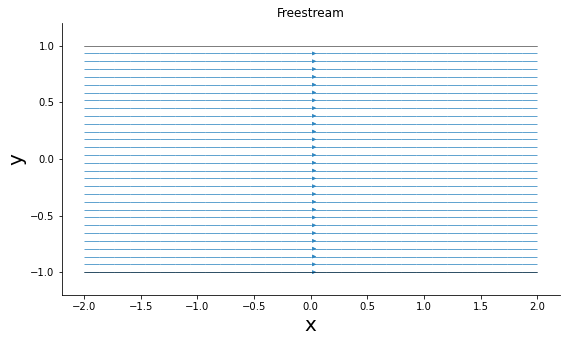

In [6]:
# Initialization of figure
ax = plotGrid(x, y, size,'topdown')

# Streamlines
ax.streamplot(xg, yg, u_freestream, v_freestream, density=1, linewidth=0.75, color='#2e86c1', arrowsize=0.75, minlength=0.8)
ax.set_title('Freestream')
plt.show()

### One cylinder

In [7]:
x_doublet1, y_doublet1 =np.cos(𝛼 + 𝜋), np.sin(𝛼 + 𝜋)    # location of the doublet

$$
R = \sqrt{\frac{\kappa}{4\pi u_{\infty}}}
$$

In [8]:
R = np.sqrt(𝜅 / (4 * 𝜋 * 𝑢_inf))

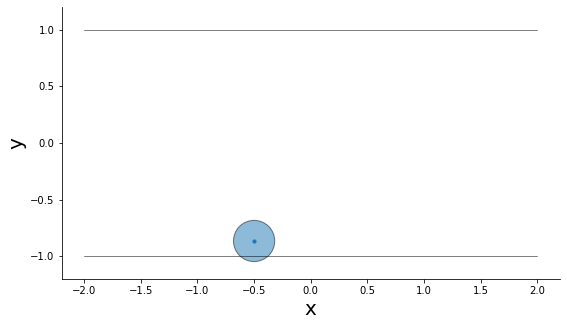

In [9]:
# Initialize the figure
ax = plotGrid(x, y, size,frame='topdown')

# Plot cylinder
ax.scatter(x_doublet1, y_doublet1, s=10) # cylinder 1
circle1 = plt.Circle((x_doublet1, y_doublet1), radius=R, fc='C0', ec='k', alpha=0.5)
ax.add_patch(circle1)

plt.show()

### Velocity doublet ...

$$u\left(x,y\right) = \frac{\partial\psi}{\partial y} = -\frac{\kappa}{2\pi}\frac{x^2-y^2}{\left(x^2+y^2\right)^2}$$$$v\left(x,y\right) = -\frac{\partial\psi}{\partial x} = -\frac{\kappa}{2\pi}\frac{2xy}{\left(x^2+y^2\right)^2}$$ 

In [10]:
def get_velocity_doublet(𝜅, xd, yd, xg, yg):
    """Returns the velocity field generated by a doublet.
    
    Arguments
    ---------
    𝜅 -- strength of the doublet.
    xd, yd -- coordinates of the doublet.
    X, Y -- mesh grid.
    """
    u = - 𝜅 /(2 * 𝜋) *((xg-xd)**2-(yg-yd)**2) / ((xg-xd)**2+(yg-yd)**2)**2
    v = - 𝜅 /(2 * 𝜋) * 2*(xg-xd)*(yg-yd) / ((xg-xd)**2+(yg-yd)**2)**2
    
    return u, v

In [11]:
# Computes the velocity field on the mesh grid
u_doublet1, v_doublet1 = get_velocity_doublet(𝜅, x_doublet1, y_doublet1, xg, yg)

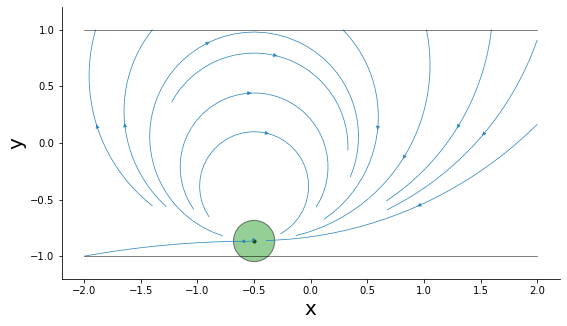

In [12]:
# Initialization of figure
ax = plotGrid(x, y, size,'topdown')

# Cylinder
ax.scatter(x_doublet1, y_doublet1, s=10, c='k')
circle1 = plt.Circle((x_doublet1, y_doublet1), radius=R, fc='C2', ec='k', alpha=0.5)
ax.add_patch(circle1)

# Streamlines
ax.streamplot(xg, yg, u_doublet1, v_doublet1, density=1, linewidth=0.75, color='#2e86c1', arrowsize=0.75, minlength=0.8)

plt.show()

### Superposition and stagnation points

In [13]:
# Superposition of the doublet on the freestream flow
u1 = u_freestream + u_doublet1
v1 = v_freestream + v_doublet1

$$
\begin{eqnarray}
(x_{s1}, y_{s1}) & = & \left( x + \sqrt{\frac{\kappa}{2\pi u_\infty}}, y \right)\\
(x_{s2}, y_{s2}) & = & \left( x - \sqrt{\frac{\kappa}{2\pi u_\infty}}, y \right)
\end{eqnarray}
$$

In [14]:
def get_stagnation_points(xd, yd, 𝜅, u_inf):
    x_1, y_1 = xd + np.sqrt(𝜅/(2*𝜋*𝑢_inf)), yd
    x_2, y_2 = xd - np.sqrt(𝜅/(2*𝜋*𝑢_inf)), yd
    
    return [x_1, x_2], [y_1, y_2]

In [15]:
# Calculate the stagnation points
x_s1, y_s1 = get_stagnation_points(x_doublet1, y_doublet1, 𝜅, 𝑢_inf)

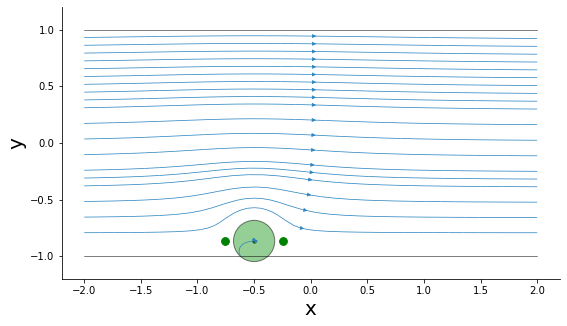

In [16]:
# Initialization of figure
ax = plotGrid(x, y, size,'topdown')

# Cylinder
ax.scatter(x_doublet1, y_doublet1, s=10, c='k')
circle1 = plt.Circle((x_doublet1, y_doublet1), radius=R, fc='C2', ec='k', alpha=0.5)
ax.add_patch(circle1)
ax.scatter(x_s1, y_s1, color='g', s=60, marker='o');

# Streamlines
ax.streamplot(xg, yg, u1, v1, density=1, linewidth=0.75, color='#2e86c1', arrowsize=0.75, minlength=0.8)

plt.show()

### Two cylinders

In [17]:
def plot_cylinder(x_d, y_d, R, x_s, y_s, color='C2', stagnation=True):
    plt.scatter(x_d, y_d, s=10, c='k')
    circle = plt.Circle((x_d, y_d), radius=R, fc=color, ec='k', alpha=0.5)
    plt.gca().add_patch(circle)
    if stagnation:
        plt.scatter(x_s, y_s, color='g', s=80, marker='o', zorder=5)
        
    return circle

Definition of the second cylinder

In [18]:
# location of the doublet
x_doublet2, y_doublet2 = np.cos(𝛼 + 𝜋/2), np.sin(𝛼 + 𝜋/2)  

# Computes the velocity field on the mesh grid
u_doublet2, v_doublet2 = get_velocity_doublet(𝜅, x_doublet2, y_doublet2, xg, yg)

# Superposition of the doublet on the freestream flow
u2 = u_freestream + u_doublet2
v2 = v_freestream + v_doublet2

# Stagnation points
x_s2, y_s2 = get_stagnation_points(x_doublet2, y_doublet2, 𝜅, 𝑢_inf)

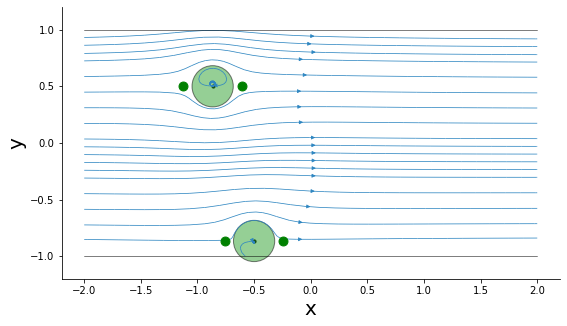

In [19]:
# Initialization of figure
ax = plotGrid(x, y, size,'topdown')

# Plot cylinders
plot_cylinder(x_doublet1, y_doublet1, R, x_s1, y_s1)   # cylinder 1
plot_cylinder(x_doublet2, y_doublet2, R, x_s2, y_s2) # cylinder 2

plt.streamplot(xg, yg, u1+u2, v1+v2, density=1, linewidth=0.75, color='#2e86c1', arrowsize=0.75, minlength=0.8)
plt.show()

---
<a name='ej-1'></a>
#### **<font color="DodgerBlue">Ejercicio 1. Agregar dos cilindros.</font>**

<font color="DarkBlue">Agregar dos cilindros en las siguientes posiciones.</font>
* Tercer cilindro: $(x,y) = (\cos(\alpha), \sin(\alpha))$.
* Cuarto cilindro: $(x,y) = (\cos(\alpha - \pi/2), \sin(\alpha-\pi/2))$.

---

In [20]:
### BEGIN SOLUTION
# location of the doublet
x_doublet3, y_doublet3 =np.cos(𝛼), np.sin(𝛼)               # location of the doublet
x_doublet4, y_doublet4 =np.cos(𝛼-𝜋/2), np.sin(𝛼-𝜋/2)       # location of the doublet

# Computes the velocity field on the mesh grid
u_doublet3, v_doublet3 = get_velocity_doublet(𝜅, x_doublet3, y_doublet3, xg, yg)
u_doublet4, v_doublet4 = get_velocity_doublet(𝜅, x_doublet4, y_doublet4, xg, yg)

# Superposition of the doublet on the freestream flow
u3 = u_freestream + u_doublet3
v3 = v_freestream + v_doublet3

u4 = u_freestream + u_doublet4
v4 = v_freestream + v_doublet4

# Stagnation points
x_s3, y_s3 = get_stagnation_points(x_doublet3, y_doublet3, 𝜅, 𝑢_inf)
x_s4, y_s4 = get_stagnation_points(x_doublet4, y_doublet4, 𝜅, 𝑢_inf)
### END SOLUTION

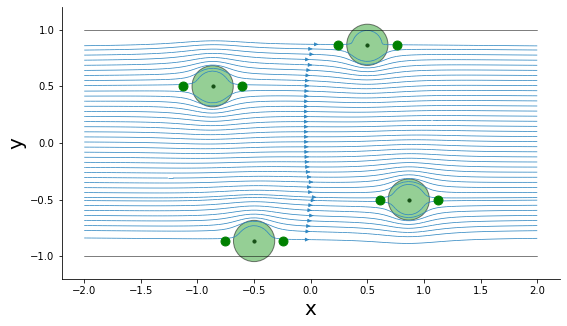

In [21]:
# Initialization of figure
ax = plotGrid(x, y, size,'topdown')

# Plot cylinders
plot_cylinder(x_doublet1, y_doublet1, R, x_s1, y_s1)   # cylinder 1
plot_cylinder(x_doublet2, y_doublet2, R, x_s2, y_s2) # cylinder 2

### BEGIN SOLUTION
plot_cylinder(x_doublet3, y_doublet3, R, x_s3, y_s3) # cylinder 2
plot_cylinder(x_doublet4, y_doublet4, R, x_s4, y_s4) # cylinder 2

plt.streamplot(xg, yg, u1+u2+u3+u4, v1+v2+v3+v4, density=3, linewidth=0.75, color='#2e86c1', arrowsize=0.75, minlength=0.8)
### END SOLUTION

plt.show()

### Using the stream function

$$\psi\left(x,y\right) = -\frac{\kappa}{2\pi}\frac{y}{x^2+y^2}$$

In [22]:
def get_stream_function_doublet(strength, xd, yd, xg, yg):
    """Returns the stream-function generated by a doublet.
    
    Arguments
    ---------
    strength -- strength of the doublet.
    xd, yd -- coordinates of the doublet.
    X, Y -- mesh grid.
    """
    psi = - strength/(2*np.pi)*(yg-yd)/((xg-xd)**2+(yg-yd)**2)
    
    return psi


In [23]:
# stream-function of the freestream flow
psi_freestream = 𝑢_inf * yg

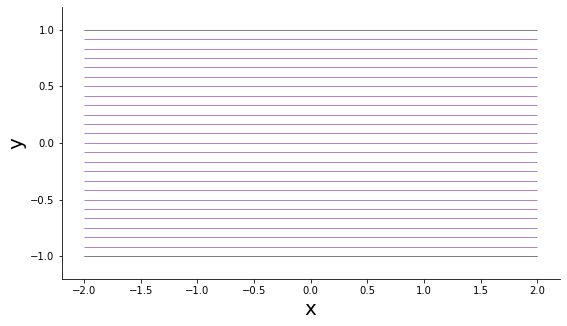

In [24]:
# Initialization of figure
ax = plotGrid(x, y, size,'topdown')
plt.contour(xg, yg, psi_freestream, levels=25, colors='#9b59b6', linewidths=0.75, linestyles='solid')
plt.show()

In [25]:
# computes the stream-function on the mesh grid
psi_doublet1 = get_stream_function_doublet(𝜅, x_doublet1, y_doublet1, xg, yg)

# superposition of the doublet on the freestream flow
psi1 = psi_freestream + psi_doublet1

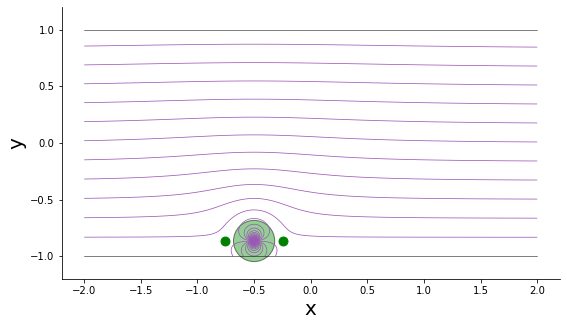

In [26]:
# Initialization of figure
ax = plotGrid(x, y, size,'topdown')

plot_cylinder(x_doublet1, y_doublet1, R, x_s1, y_s1)   # cylinder 1

plt.contour(xg, yg, psi1, levels=50, colors='#9b59b6', linewidths=0.75, linestyles='solid')

plt.show()

---
<a name='ej-2'></a>
#### **<font color="DodgerBlue">Ejercicio 2. Agregar los tres cilindros restantes.</font>**

---

In [27]:
# computes the stream-function on the mesh grid
psi_doublet2 = get_stream_function_doublet(𝜅, x_doublet2, y_doublet2, xg, yg)
psi_doublet3 = get_stream_function_doublet(𝜅, x_doublet3, y_doublet3, xg, yg)
psi_doublet4 = get_stream_function_doublet(𝜅, x_doublet4, y_doublet4, xg, yg)

# superposition of the doublet on the freestream flow
psi2 = psi_freestream + psi_doublet2
psi3 = psi_freestream + psi_doublet3
psi4 = psi_freestream + psi_doublet4

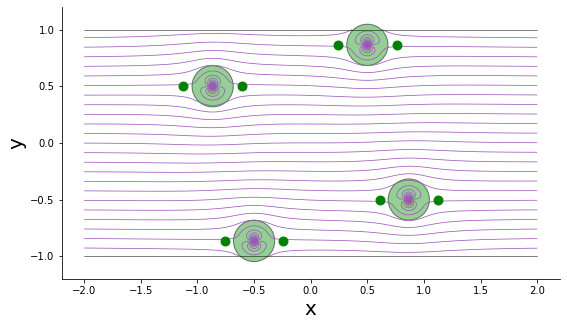

In [28]:
# Initialization of figure
ax = plotGrid(x, y, size,'topdown')

plot_cylinder(x_doublet1, y_doublet1, R, x_s1, y_s1)   # cylinder 1
plot_cylinder(x_doublet2, y_doublet2, R, x_s2, y_s2)   # cylinder 1
plot_cylinder(x_doublet3, y_doublet3, R, x_s3, y_s3)   # cylinder 1
plot_cylinder(x_doublet4, y_doublet4, R, x_s4, y_s4)   # cylinder 1

plt.contour(xg, yg, psi1+psi2+psi3+psi4, levels=50, colors='#9b59b6', linewidths=0.75, linestyles='solid')

plt.show()

### Add a vortex

$$\psi\left(x,y\right) = \frac{\Gamma}{4\pi}\ln\left(x^2+y^2\right)$$

$$u\left(x,y\right) = \frac{\Gamma}{2\pi}\frac{y}{x^2+y^2} \qquad v\left(x,y\right) = -\frac{\Gamma}{2\pi}\frac{x}{x^2+y^2}$$ 

In [29]:
def get_velocity_vortex(Γ, xv, yv, xg, yg):
    """Returns the velocity field generated by a vortex.
    
    Arguments
    ---------
    strength -- strength of the vortex.
    xv, yv -- coordinates of the vortex.
    X, Y -- mesh grid.
    """
    u = + Γ/(2*𝜋)*(yg-yv)/((xg-xv)**2+(yg-yv)**2)
    v = - Γ/(2*𝜋)*(xg-xv)/((xg-xv)**2+(yg-yv)**2)
    return u, v

def get_stream_function_vortex(Γ, xv, yv, xg, yg):
    """Returns the stream-function generated by a vortex.
    
    Arguments
    ---------
    strength -- strength of the vortex.
    xv, yv -- coordinates of the vortex.
    X, Y -- mesh grid.
    """
    psi = Γ/(4*𝜋)*np.log((xg-xv)**2+(yg-yv)**2)
    
    return psi

### First cylinder

In [30]:
Γ1 = 4.0                                  # strength of the vortex

In [31]:
def get_stagnation_points_vortex(xd, yd, Γ, u_inf):
    x_1, y_1 = +np.sqrt(R**2-(Γ/(4*𝜋*𝑢_inf))**2), -Γ/(4*𝜋*𝑢_inf)
    x_2, y_2 = -np.sqrt(R**2-(Γ/(4*𝜋*𝑢_inf))**2), -Γ/(4*𝜋*𝑢_inf)
    
    return [x_1, x_2], [y_1, y_2]

In [32]:
# computes the velocity field on the mesh grid
u_vortex1, v_vortex1 = get_velocity_vortex(Γ1, x_doublet1, y_doublet1, xg, yg)

# computes the stream-function on the mesh grid
psi_vortex1 = get_stream_function_vortex(Γ1, x_doublet1, y_doublet1, xg, yg)

# superposition of the doublet and the vortex on the freestream flow
u1 = u_freestream + u_doublet1 + u_vortex1
v1 = v_freestream + v_doublet1 + v_vortex1
psi1 = psi_freestream + psi_vortex1

# stagnation points
x_s1, y_s1 = get_stagnation_points(x_doublet1, y_doublet1, 1., 𝑢_inf)

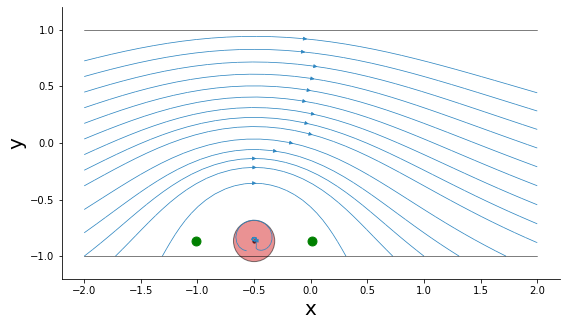

In [33]:
# Initialization of figure
ax = plotGrid(x, y, size,'topdown')
plot_cylinder(x_doublet1, y_doublet1, R, x_s1, y_s1, color='C3')   # cylinder 1
plt.streamplot(xg, yg, u1, v1, density=1, linewidth=0.75, color='#2e86c1', arrowsize=0.75, minlength=0.8)
plt.show()

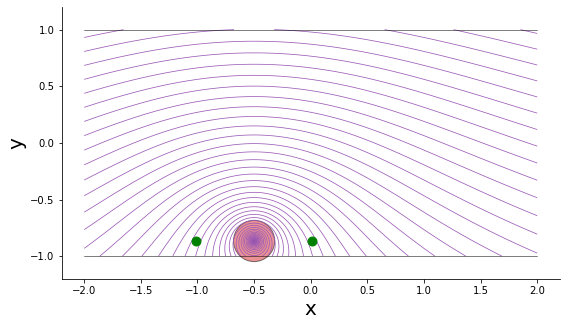

In [34]:
# Initialization of figure
ax = plotGrid(x, y, size,'topdown')
plot_cylinder(x_doublet1, y_doublet1, R, x_s1, y_s1, color='C3')   # cylinder 1
plt.contour(xg, yg, psi1, levels=50, colors='#9b59b6', linewidths=0.75, linestyles='solid')
plt.show()

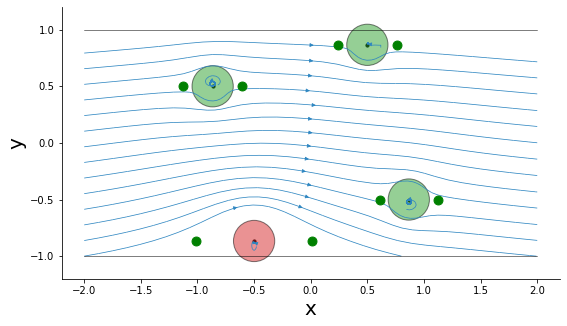

In [35]:
# Initialization of figure
ax = plotGrid(x, y, size,'topdown')

plot_cylinder(x_doublet1, y_doublet1, R, x_s1, y_s1, color='C3')   # cylinder 1
plot_cylinder(x_doublet2, y_doublet2, R, x_s2, y_s2) # cylinder 2
plot_cylinder(x_doublet3, y_doublet3, R, x_s3, y_s3) # cylinder 2
plot_cylinder(x_doublet4, y_doublet4, R, x_s4, y_s4) # cylinder 2

plt.streamplot(xg, yg, u1+u2+u3+u4, v1+v2+v3+v4, density=1, linewidth=0.75, color='#2e86c1', arrowsize=0.75, minlength=0.8)
plt.show()

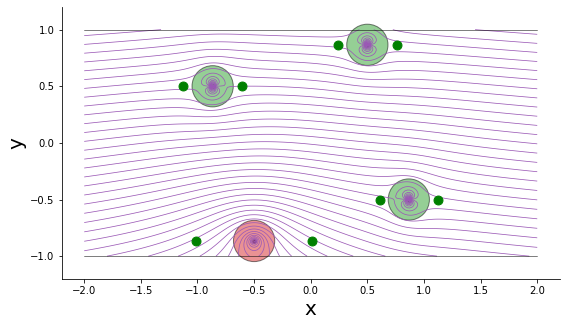

In [36]:
# Initialization of figure
ax = plotGrid(x, y, size,'topdown')

plot_cylinder(x_doublet1, y_doublet1, R, x_s1, y_s1, color='C3')   # cylinder 1
plot_cylinder(x_doublet2, y_doublet2, R, x_s2, y_s2) # cylinder 2
plot_cylinder(x_doublet3, y_doublet3, R, x_s3, y_s3) # cylinder 2
plot_cylinder(x_doublet4, y_doublet4, R, x_s4, y_s4) # cylinder 2

plt.contour(xg, yg, psi1+psi2+psi3+psi4, levels=50, colors='#9b59b6', linewidths=0.75, linestyles='solid')

plt.show()

In [37]:
Γ2 = 4.0                                  # strength of the vortex
Γ3 = 4.0                                  # strength of the vortex
Γ4 = 4.0                                  # strength of the vortex

In [38]:
# computes the velocity field on the mesh grid
u_vortex2, v_vortex2 = get_velocity_vortex(Γ2, x_doublet2, y_doublet2, xg, yg)
u_vortex3, v_vortex3 = get_velocity_vortex(Γ3, x_doublet3, y_doublet3, xg, yg)
u_vortex4, v_vortex4 = get_velocity_vortex(Γ4, x_doublet4, y_doublet4, xg, yg)

# computes the stream-function on the mesh grid
psi_vortex2 = get_stream_function_vortex(Γ2, x_doublet2, y_doublet2, xg, yg)
psi_vortex3 = get_stream_function_vortex(Γ3, x_doublet3, y_doublet3, xg, yg)
psi_vortex4 = get_stream_function_vortex(Γ4, x_doublet4, y_doublet4, xg, yg)

# superposition of the doublet and the vortex on the freestream flow
u2 = u_freestream + u_doublet2 + u_vortex2
v2 = v_freestream + v_doublet2 + v_vortex2
psi2 = psi_freestream + psi_vortex2

u3 = u_freestream + u_doublet3 + u_vortex3
v3 = v_freestream + v_doublet3 + v_vortex3
psi3 = psi_freestream + psi_vortex3

u4 = u_freestream + u_doublet4 + u_vortex4
v4 = v_freestream + v_doublet4 + v_vortex4
psi4 = psi_freestream + psi_vortex4

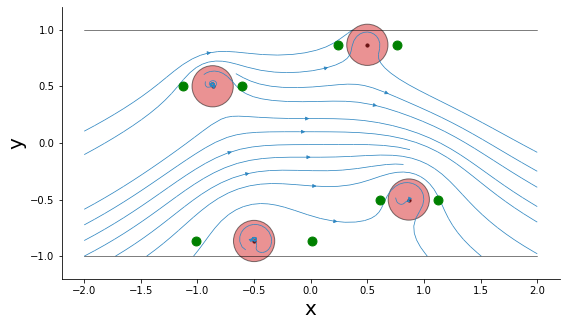

In [39]:
# Initialization of figure
ax = plotGrid(x, y, size,'topdown')

plot_cylinder(x_doublet1, y_doublet1, R, x_s1, y_s1, color='C3')   # cylinder 1
plot_cylinder(x_doublet2, y_doublet2, R, x_s2, y_s2, color='C3') # cylinder 2
plot_cylinder(x_doublet3, y_doublet3, R, x_s3, y_s3, color='C3') # cylinder 2
plot_cylinder(x_doublet4, y_doublet4, R, x_s4, y_s4, color='C3') # cylinder 2

plt.streamplot(xg, yg, u1+u2+u3+u4, v1+v2+v3+v4, density=1, linewidth=0.75, color='#2e86c1', arrowsize=0.75, minlength=0.8)
plt.show()

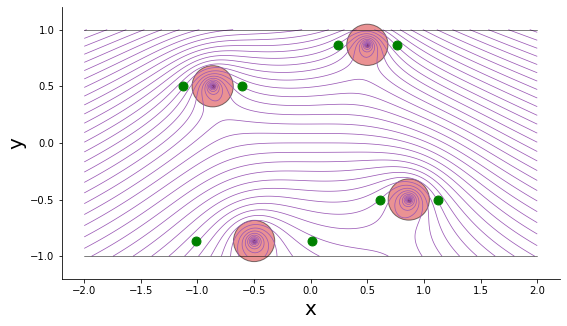

In [40]:
# Initialization of figure
ax = plotGrid(x, y, size,'topdown')

plot_cylinder(x_doublet1, y_doublet1, R, x_s1, y_s1, color='C3')   # cylinder 1
plot_cylinder(x_doublet2, y_doublet2, R, x_s2, y_s2, color='C3') # cylinder 2
plot_cylinder(x_doublet3, y_doublet3, R, x_s3, y_s3, color='C3') # cylinder 2
plot_cylinder(x_doublet4, y_doublet4, R, x_s4, y_s4, color='C3') # cylinder 2

plt.contour(xg, yg, psi1+psi2+psi3+psi4, levels=50, colors='#9b59b6', linewidths=0.75, linestyles='solid')

plt.show()

In [41]:
𝜅 = 0.25         # strength of the doublet
𝛼 = 𝜋 * 0.0      # inclination of the cross with respect to the positive x direction.
R = np.sqrt(𝜅 / (4 * 𝜋 * 𝑢_inf))

In [42]:
from matplotlib import animation

In [115]:
def cylinder_definition(𝛼):
    xd1, yd1 = 0.75 * np.cos(𝛼 + 𝜋), 0.75 * np.sin(𝛼 + 𝜋)
    xd2, yd2 = 0.75 * np.cos(𝛼 + 𝜋/2), 0.75 * np.sin(𝛼 + 𝜋/2)
    xd3, yd3 = 0.75 * np.cos(𝛼), 0.75 * np.sin(𝛼)     
    xd4, yd4 = 0.75 * np.cos(𝛼 - 𝜋/2), 0.75 * np.sin(𝛼 - 𝜋/2)
    return [(xd1, yd1), (xd2, yd2), (xd3, yd3), (xd4, yd4)]

def stream_function(𝛼, 𝜅, Γ1, Γ2, Γ3, Γ4, xg, yg, streamplot = False):
    cc = cylinder_definition(𝛼)
        
    if streamplot:
        # Computes the velocity field on the mesh grid
        u_d1, v_d1 = get_velocity_doublet(𝜅, cc[0][0], cc[0][1], xg, yg)
        u_d2, v_d2 = get_velocity_doublet(𝜅, cc[1][0], cc[1][1], xg, yg)
        u_d3, v_d3 = get_velocity_doublet(𝜅, cc[2][0], cc[2][1], xg, yg)
        u_d4, v_d4 = get_velocity_doublet(𝜅, cc[3][0], cc[3][1], xg, yg)

        # computes the velocity field on the mesh grid
        u_v1, v_v1 = get_velocity_vortex(Γ1, cc[0][0], cc[0][1], xg, yg)
        u_v2, v_v2 = get_velocity_vortex(Γ2, cc[1][0], cc[1][1], xg, yg)
        u_v3, v_v3 = get_velocity_vortex(Γ3, cc[2][0], cc[2][1], xg, yg)
        u_v4, v_v4 = get_velocity_vortex(Γ4, cc[3][0], cc[3][1], xg, yg)

        # Superposition of the doublet on the freestream flow
        u1 = u_freestream + u_d1 + u_v1
        v1 = v_freestream + v_d1 + v_v1
        u2 = u_freestream + u_d2 + u_v2
        v2 = v_freestream + v_d2 + v_v2
        u3 = u_freestream + u_d3 + u_v2
        v3 = v_freestream + v_d3 + v_v3
        u4 = u_freestream + u_d4 + u_v4
        v4 = v_freestream + v_d4 + v_v4
        
        u_sum = u1 + u2 + u3 + u4
        v_sum = v1 + v2 + v3 + v4

        return u_sum, v_sum
    
    else:
        # computes the stream-function on the mesh grid
        p1 = psi_freestream + get_stream_function_doublet(𝜅, cc[0][0], cc[0][1], xg, yg)
        p2 = psi_freestream + get_stream_function_doublet(𝜅, cc[1][0], cc[1][1], xg, yg)
        p3 = psi_freestream + get_stream_function_doublet(𝜅, cc[2][0], cc[2][1], xg, yg)
        p4 = psi_freestream + get_stream_function_doublet(𝜅, cc[3][0], cc[3][1], xg, yg)

        p1_v = get_stream_function_vortex(Γ1, cc[0][0], cc[0][1], xg, yg)
        p2_v = get_stream_function_vortex(Γ2, cc[1][0], cc[1][1], xg, yg)
        p3_v = get_stream_function_vortex(Γ3, cc[2][0], cc[2][1], xg, yg)
        p4_v = get_stream_function_vortex(Γ4, cc[3][0], cc[3][1], xg, yg)

        s_f = p1+p1_v + p2+p2_v + p3+p3_v + p4+p4_v
    
        return s_f

In [116]:
𝛼 = 0
Γ1, Γ2, Γ3, Γ4 = 4.0, 0.0, -4.0, 0.0 

In [117]:
def mi_animacion(i, 𝜅, Γ1, Γ2, Γ3, Γ4, xg, yg, streamplot=False):
    𝛼 = 𝜋 * 8 * i / 90
    cc = cylinder_definition(𝛼)

    # Initialization of figure
    ax = plotGrid(x, y, size,'topdown')

    if streamplot:
        u_f, v_f = stream_function(𝛼, 𝜅, Γ1, Γ2, Γ3, Γ4, xg, yg, streamplot)
        ax.streamplot(xg, yg, u_f, v_f, density=1.0, linewidth=0.75, color='#2e86c1', arrowsize=0.75, minlength=0.8)
    else:
        s_f = stream_function(𝛼, 𝜅, Γ1, Γ2, Γ3, Γ4, xg, yg, streamplot)
        ax.contour(xg, yg, s_f, levels=100, colors='#9b59b6', 
                   linewidths=0.75, linestyles='solid')
        
    circ1 = plt.Circle(cc[0], radius=R, fc='C1', ec='k', alpha=0.5)
    circ2 = plt.Circle(cc[1], radius=R, fc='C2', ec='k', alpha=0.5)
    circ3 = plt.Circle(cc[2], radius=R, fc='C3', ec='k', alpha=0.5)
    circ4 = plt.Circle(cc[3], radius=R, fc='C4', ec='k', alpha=0.5)
    ax.add_patch(circ1)
    ax.add_patch(circ2)
    ax.add_patch(circ3)
    ax.add_patch(circ4)

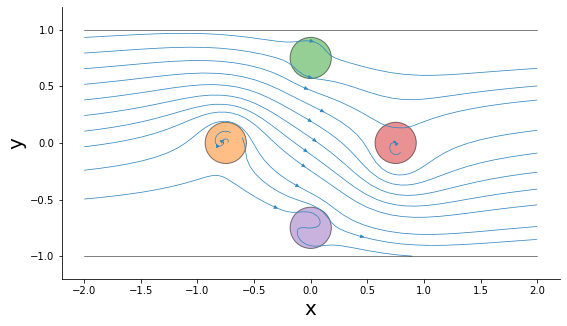

In [118]:
mi_animacion(0, 𝜅, Γ1, Γ2, Γ3, Γ4, xg, yg, streamplot=True)

In [119]:
import ipywidgets as widgets

In [120]:
widgets.interact(mi_animacion, 
                 i = widgets.IntSlider(min = 0, max = 23, description='rotación'),
                 𝜅 = widgets.fixed(𝜅), 
                 Γ1 = widgets.FloatSlider(min=0, max=4, step = 2), 
                 Γ2 = widgets.fixed(Γ2), 
                 Γ3 = widgets.fixed(Γ3), 
                 Γ4 = widgets.fixed(Γ4),
                 xg = widgets.fixed(xg),
                 yg = widgets.fixed(yg),
                 streamplot=widgets.ToggleButton(value=False))

interactive(children=(IntSlider(value=0, description='rotación', max=23), FloatSlider(value=0.0, description='…

<function __main__.mi_animacion(i, κ, Γ1, Γ2, Γ3, Γ4, xg, yg, streamplot=False)>

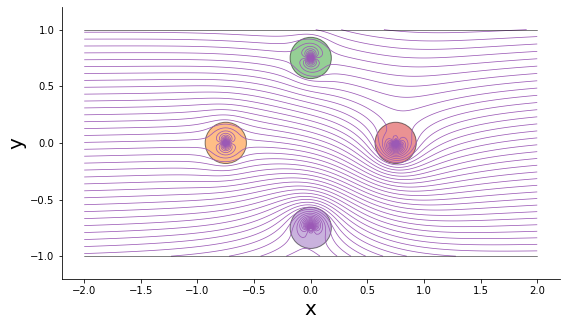

In [123]:
Γ1 = 0.0 
Γ2 = 0.0 
Γ3 = -4.0 
Γ4 = 4.0 

# Initialization of figure
ax = plotGrid(x, y, size,'topdown')
𝛼 = 0
center = cylinder_definition(𝛼)
s_f = stream_function(𝛼, 𝜅, Γ1, Γ2, Γ3, Γ4, xg, yg)
circ1 = plt.Circle(center[0], radius=R, fc='C1', ec='k', alpha=0.5)
circ2 = plt.Circle(center[1], radius=R, fc='C2', ec='k', alpha=0.5)
circ3 = plt.Circle(center[2], radius=R, fc='C3', ec='k', alpha=0.5)
circ4 = plt.Circle(center[3], radius=R, fc='C4', ec='k', alpha=0.5)

con = ax.contour(xg, yg, s_f, levels=100, colors='#9b59b6', linewidths=0.75, linestyles='solid')

def init():
    ax.add_patch(circ1)
    ax.add_patch(circ2)
    ax.add_patch(circ3)
    ax.add_patch(circ4)
    return circ1, circ2, circ3, circ4
    
def four_cyl_coord(i):
    𝛼 = 𝜋 * 4 * i / 90
    center = cylinder_definition(𝛼)
    s_f = stream_function(𝛼, 𝜅, Γ1, Γ2, Γ3, Γ4, xg, yg)

    circ1.center = center[0]
    circ2.center = center[1]
    circ3.center = center[2]
    circ4.center = center[3]

    ax.collections = []
    ax.contour(xg, yg, s_f, levels=100, colors='#9b59b6', linewidths=0.75, linestyles='solid')
    
    return circ1, circ2, circ3, circ4

anim = animation.FuncAnimation(ax.get_figure(), 
                               four_cyl_coord, 
                               init_func=init, 
                               frames=45, 
                               interval=20,
                               blit=True)

In [124]:
from IPython.display import HTML
HTML(anim.to_jshtml())

In [58]:
from matplotlib.animation import writers
Writer = writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=-1)
anim.save('magnus.mp4', writer=writer)

RuntimeError: Requested MovieWriter (ffmpeg) not available